# Прогнозирование продаж и EDA 

Часть 1: Предварительный анализ данных

In [1]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Задача: Загрузить данные из файла 'sales.csv' в DataFrame с помощью библиотеки pandas.

# ВАШ КОД

**Давайте взглянем на набор данных**

In [3]:
# ВАШ КОД

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# #Описание данных

# ВАШ КОД

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
#сортировка данных по дате заказа

# ВАШ КОД

In [7]:
#установка индекса в качестве даты очень поможет нам в дальнейшем

# ВАШ КОД

**проверка наличия каких-либо нулевых данных или нет**

In [11]:
# ВАШ КОД


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


<b>Для обработки нулевых значений в почтовом индексе. Мы не будем их удалять, вместо этого мы добавим почтовый индекс соответствующего города.<br>
1. нам нужно найти города, для которых почтовый индекс не указан. 
2. Введите почтовый индекс соответствующего города в колонку почтовый индекс.</b>

In [12]:
# Задача: Найти и отобразить все строки во фрейме данных, где в столбце "Почтовый индекс" отсутствуют значения.

# ВАШ КОД

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Мы видим, что почтовый индекс указан не только для города Берлингтон в штате Вермонт. Итак, нам нужно ввести почтовый индекс этого города.**

In [13]:
# Задача: Заполнить недостающие значения в столбце "Почтовый индекс" значением 

# ВАШ КОД

In [14]:
# Задача: Вывести количество пропущенных значений в каждом столбце фрейма данных.

# ВАШ КОД

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


**<h3>Давайте выясним, кто является самыми ценными клиентами!</h3>**

Самые ценные клиенты - это клиенты, которые приносят компании наибольшую прибыль. <br>
Эти клиенты покупают больше товаров или продукцию с более высокой стоимостью, чем среднестатистический покупатель.

In [15]:
# Отсортируйте клиентов по продажам
# Округлите значение продаж до 2 знаков после запятой
# # Поскольку мы использовали group by, нам придется сбросить индекс, чтобы добавить имя клиента в dataframe

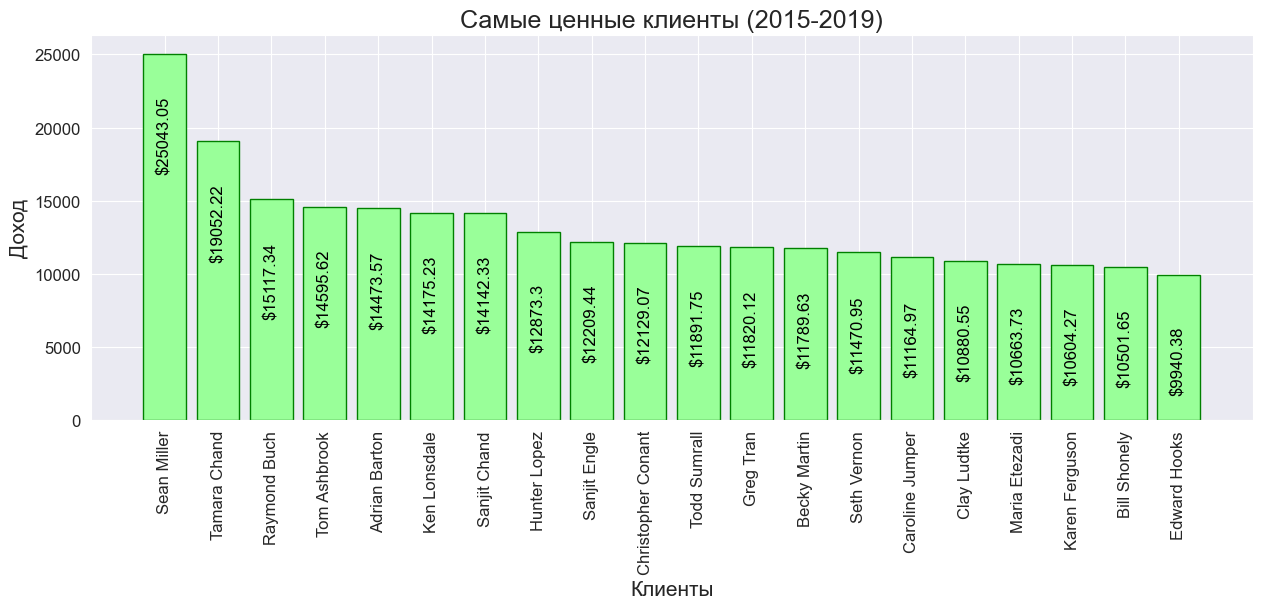

In [17]:
 # ширина и высота фигуры определяются в дюймах

# Задача: Создайте гистограмму, показывающую продажи для каждого клиента, где по оси x отложены имена клиентов, а по оси y - сумма продаж. Используйте зеленый цвет для столбцов со светло-зелеными краями.

# по оси x показаны клиенты 
# по оси y показан доход


for k,v in Top_customers["Sales"].items(): #Чтобы показать точный доход, полученный на рисунке
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**<h3>Дайте понять, как вы отнеслись к такому высокому результату!</h3>**

Вот Топ-10 штатов, которые принесли самый высокий доход

In [18]:
# Отсортируйте состояния в соответствии с продажами
# Округлите значение продаж до 2 знаков после запятой
# # Поскольку мы использовали groupby, нам придется сбросить индекс, чтобы добавить состояния в dataframe

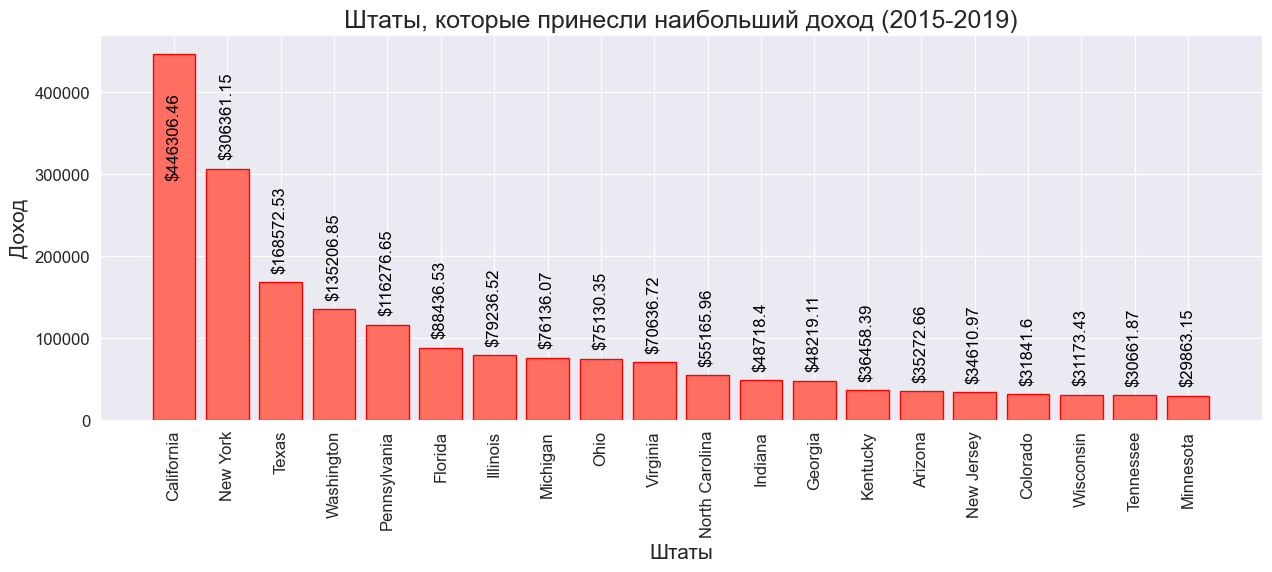

In [20]:
# ширина и высота рисунка указаны в дюймах

# по оси x показаны штаты
# по оси y показан доход

for k,v in Top_states["Sales"].items(): #Чтобы показать точный доход, полученный на рисунке
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

**<h3>Давайте выясним, какие города принесли наибольший доход!</h3>**

Вот топ-10 городов, которые принесли наибольший доход

In [21]:
# Отсортируйте штаты в соответствии с продажами

# Округлите значение продаж до 2 знаков после запятой

# # Поскольку мы использовали groupby, нам придется сбросить индекс, чтобы добавить города во фрейм данных

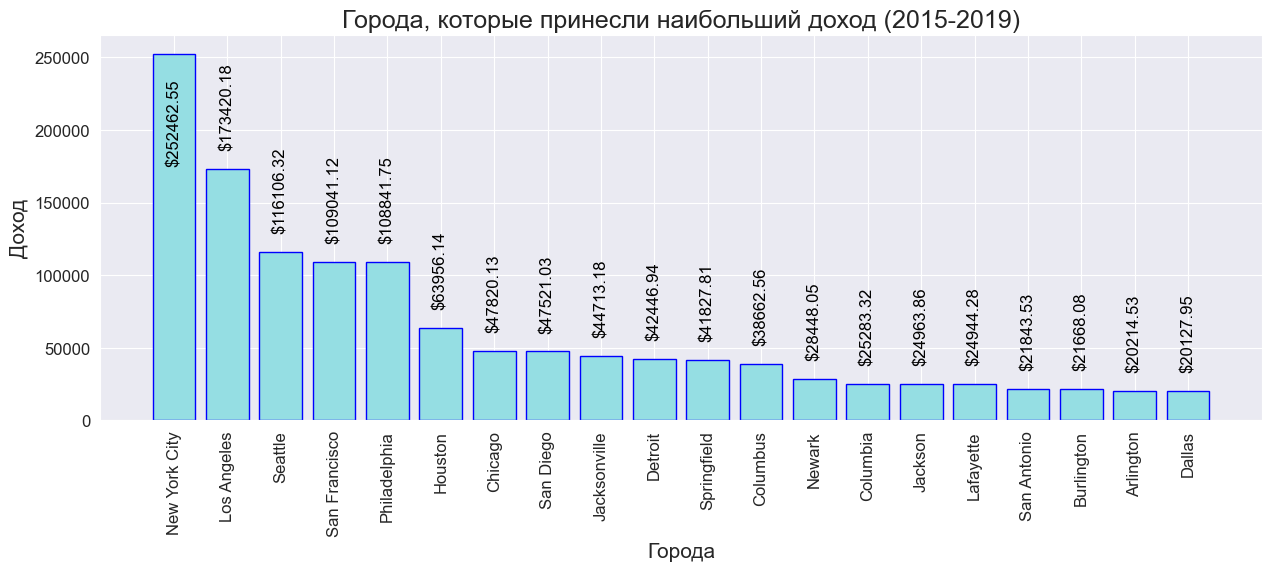

In [23]:
 # ширина и высота рисунка указаны в дюймах

# по оси x показаны штаты

# по оси y показан доход

for k,v in Top_cities["Sales"].items(): # Чтобы показать точный доход, полученный на рисунке
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

<h3><b>Which Region has the highest sales?</h3>


In [29]:
# Отсортируйте регион по продажам

# Приведите столбец продаж к целочисленному типу данных

# # Поскольку мы использовали groupby, нам придется сбросить индекс, чтобы добавить столбец региона во фрейм данных

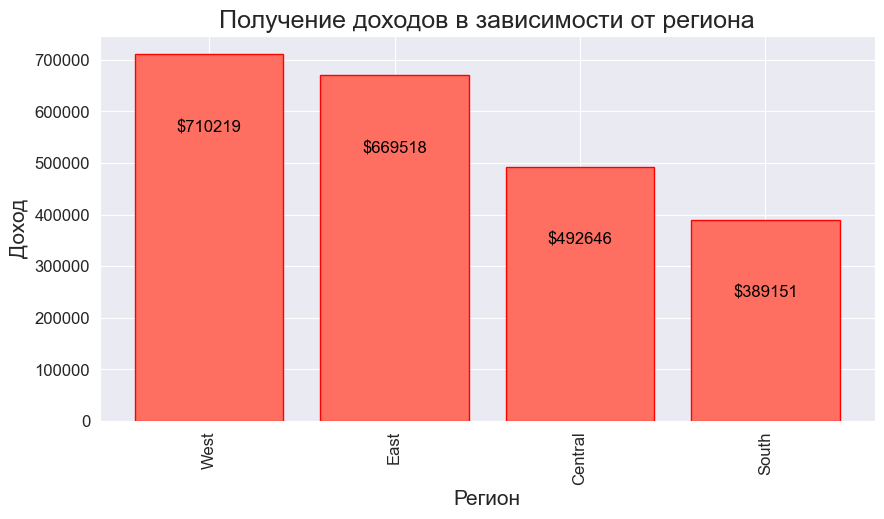

In [31]:
 # ширина и высота рисунка указаны в дюймах

# по оси x показан регион 

# по оси y показан полученный доход

for k,v in Top_region["Sales"].items(): #Чтобы показать точный доход, полученный на рисунке
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

<h3>Какой способ доставки обеспечивает самые высокие продажи?</h3>

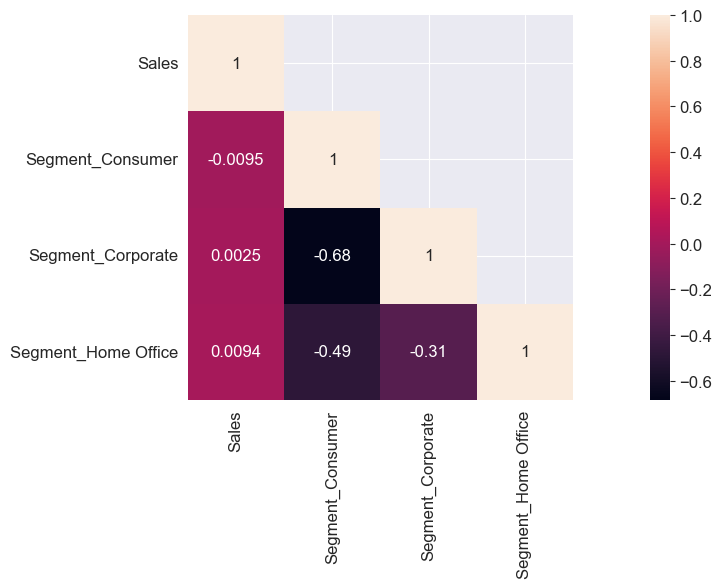

In [34]:
df1 = df[['Segment','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);

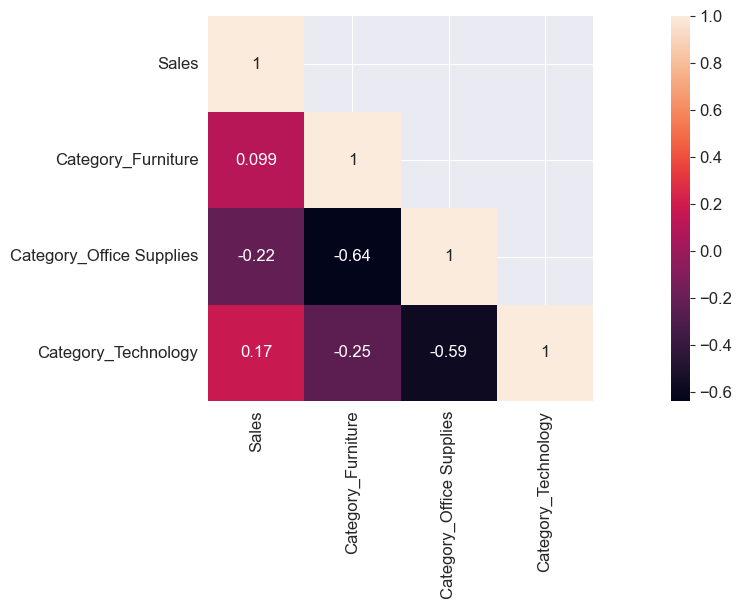

In [35]:
# ВАШ КОД 

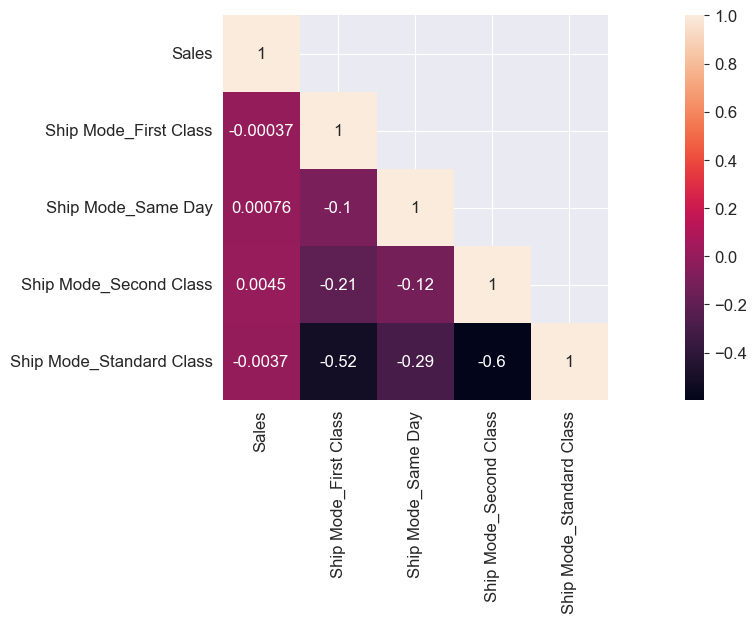

In [36]:
# ВАШ КОД 